# Ejercicio 8

In [4]:
from sympy import  *
import numpy as np
from sympy.abc import s
from IPython.display import display, Math
from splane import pzmap, GroupDelay, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import math as m

w_p = 45000*2*pi
w_s = 12000*2*pi

w_p_n = w_p / w_p
w_s_n = w_s / w_p

Omega_p = 1 / w_p_n
Omega_s = 1 / w_s_n

w_s_lp = abs(Omega_s)

alpha_max = 1    # dB
alpha_min = 54   # dB

epsilon = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
N = m.acosh(sqrt(m.pow(10, alpha_min * 0.1) - 1) / epsilon) / (m.acosh(w_s_lp))
N = m.ceil(N)

print(f'epsilon: {epsilon}, N: {N}')

epsilon: 0.5088471399095875, N: 4


In [5]:
w,T=symbols("w,T")
T = 1/(1+(0.259)*(8*w**4 - 8*w**2 +1)**2)


num, den = fraction(simplify(expand(T)))  #simplificamos y separamos numerador y denominador

display(T)

num = Poly(num,s)
den = Poly(den,s)

T = num/den
display(T)

1/(0.259*(8*w**4 - 8*w**2 + 1)**2 + 1)

1/(16.576*w**8 - 33.152*w**6 + 20.72*w**4 - 4.144*w**2 + 1.259)

array([-0.13956828+0.98340587j, -0.13956828-0.98340587j,
        0.13956828+0.98340587j,  0.13956828-0.98340587j,
       -0.33694764+0.40734005j, -0.33694764-0.40734005j,
        0.33694764+0.40734005j,  0.33694764-0.40734005j])

(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

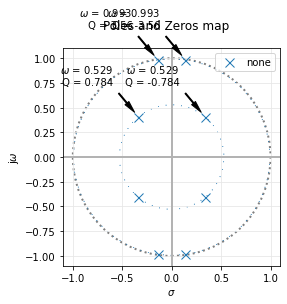

In [11]:
coeffs_den = [16.576,0,33.152,0,20.72,0,4.144,0,1.26]#aca ya estoy en s, por eso cambian los signos de los coeficientes

root = np.roots(coeffs_den)

display(root)

my_tf = TransferFunction( [1], coeffs_den )

pzmap(my_tf, 8) #S plane pole/zero plot

In [13]:
polos = np.roots(coeffs_den)
polost = []


for polo in polos:
    if (polo.real <0):
        polost.append(polo.round(2))
        
print("polos:",polost)        

polos: [(-0.14+0.98j), (-0.14-0.98j), (-0.34+0.41j), (-0.34-0.41j)]


In [14]:
wo_1 = abs(polost[0])
print("wo1 =",wo_1)

wo_2 = abs(polost[2])
print("wo2 =",wo_2)


q1 = 1/(2*cos(atan(polost[0].imag/polost[0].real)))
print("Q1 =",q1)
q2 = 1/(2*cos(atan(polost[2].imag/polost[2].real)))
print("Q2 =",q2)

wo1 = 0.9899494936611665
wo2 = 0.532634959423431
Q1 = 3.53553390593274
Q2 = 0.783286705034457


In [25]:
T1,T2 = symbols("T1,T2")

T1 = wo_1**2/(s**2 + s*(wo_1/q1) + wo_1**2)
display(T1)
T2 = wo_2**2/(s**2 + s*(wo_2/q2) + wo_2**2)
display(T2)

0.98/(s**2 + 0.28*s + 0.98)

0.2837/(s**2 + 0.68*s + 0.2837)

In [26]:
T1 = T1.subs(s, 1/s)
T2 = T2.subs(s, 1/s)
T1 = simplify(expand(T1))
T2 = simplify(expand(T2))
display(T1)
display(T2)

0.98*s**2/(0.98*s**2 + 0.28*s + 1)

0.2837*s**2/(0.2837*s**2 + 0.68*s + 1)

In [27]:
T1 = T1.subs(s, s*w_p)
T2 = T2.subs(s, s*w_p)
T1 = simplify(expand(T1))
T2 = simplify(expand(T2))
display(T1)
display(T2)

7938000000.0*pi**2*s**2/(7938000000.0*pi**2*s**2 + 25200.0*pi*s + 1)

2297970000.0*pi**2*s**2/(2297970000.0*pi**2*s**2 + 61200.0*pi*s + 1)

In [39]:
num1, den1 = fraction(simplify(expand(T1)))  #simplificamos y separamos numerador y denominador
num2, den2 = fraction(simplify(expand(T2)))  #simplificamos y separamos numerador y denominador

num1 = Poly(num1,s)
den1 = Poly(den1,s)
num2 = Poly(num2,s)
den2 = Poly(den2,s)

num1 = num1.monic() #hacemos que el numerador y denominador sean monicos
den1 = den1.monic()
num2 = num2.monic() #hacemos que el numerador y denominador sean monicos
den2 = den2.monic()

T1 = num1/den1
T2 = num2/den2

display(T1)
display(T2)


1.0*s**2/(1.0*s**2 + 3.17460317460317e-6*s/pi + 1.25976316452507e-10/pi**2)

1.0*s**2/(1.0*s**2 + 2.66322014647711e-5*s/pi + 4.35166690600835e-10/pi**2)

Para implementar este circuito usaremos la siguiente estructura:
    
<img src="img/ej8/Estructura_OTA.png">

Su transferencia es:

<img src="img/ej8/transf_OTA.png">


En este caso, como necesitamos el $s^{2}$ en el numerador, conectamos $V_A$ y $V_B$ a masa y asi la transferencia nos queda:

$
{\Large \frac{V_{o1}}{V_C} = \frac{s^{2}C_1 C_2}{s^{2}C_1 C_2 + sC_1 g_{m2} + g_{m1}g_{m2}}}$